# # OTA_HotelRateAmountNotifRQ

Analysis is done on basis of 11 files that were processed at 1st of December 2021.


## Import the relevant libraries

In [2]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()

## Load all parquet files that were available with that message

In [3]:
OTA_HotelRateAmountNotifRQ_Messages = pd.read_parquet("Documents/ota_ugo_rate_amount", engine='auto')
OTA_HotelRateAmountNotifRQ_Messages

,HotelRateAmountNotifRQ_Messages
0,[{'MessageMeta': {'X-Correlation-ID': 'f46c2df...
1,[{'MessageMeta': {'X-Correlation-ID': '48d3888...
2,[{'MessageMeta': {'X-Correlation-ID': 'd56b602...
3,[{'MessageMeta': {'X-Correlation-ID': '392874a...
4,[{'MessageMeta': {'X-Correlation-ID': 'd4320d0...
5,[{'MessageMeta': {'X-Correlation-ID': 'cf4de46...
6,[{'MessageMeta': {'X-Correlation-ID': 'd045139...
7,[{'MessageMeta': {'X-Correlation-ID': '21b2781...
8,[{'MessageMeta': {'X-Correlation-ID': '88e0c03...
9,[{'MessageMeta': {'X-Correlation-ID': '3905704...


## Create DataFrame from loaded data

### Resolving first level of nesting<hr>

In [4]:
firstLevel = []
for index, level in OTA_HotelRateAmountNotifRQ_Messages.iterrows():
    firstLevel.extend(OTA_HotelRateAmountNotifRQ_Messages.iloc[index,0])

### Resolving all levels of nesting<hr>

In [5]:
import ast
import re

def resolveNestedArray(di, row_data):
    newDi = []
    for row in row_data:
        di.update(row)
        newDi.append(di)
    return newDi

def isDict(vvalue):
    if re.search("\{",str(vvalue)):
        return True
    else:
        return False
    
    
def unnestFile(li, key_level=""):
    listOfUnnested = []
    for level in li:
        row_data = None
        level1 = {}
        for key, value in level.items():
            if isinstance(value, np.ndarray):
                row_data = unnestFile(value, key+"_")
            elif isinstance(value, str)&isDict(value):
                level1[key_level+"_"+ key] = ast.literal_eval(value)   
            elif isinstance(value, dict):
                level1.update(value)
            elif isinstance(value, list):
                for l in value:
                    if isinstance(l, dict):
                       level1.update(l) 
            else:
                level1[key_level+key] = value

        if row_data is not None:
            newDi = resolveNestedArray(level1, row_data)
            listOfUnnested.extend(newDi)
        else:
            listOfUnnested.append(level1)
    return listOfUnnested


def prepareForDF(firstLevel):
    levelTemp = unnestFile(firstLevel)
    while any(isinstance(n, dict) for n in levelTemp[0].values())|any(isinstance(m, np.ndarray) for m in levelTemp[0].values())|any(isinstance(l, list) for l in levelTemp[0].values()):
        newL = unnestFile(levelTemp)
        levelTemp = newL
    return levelTemp              

final = prepareForDF(firstLevel)

### Creating DataFrame<hr>

In [6]:
finalData_raw = pd.DataFrame(final)

In [7]:
finalData_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290048 entries, 0 to 290047
Data columns (total 62 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   X-Correlation-ID                  290048 non-null  object
 1   Type                              290048 non-null  object
 2   AppId                             290048 non-null  object
 3   PrimaryLangID                     0 non-null       object
 4   EchoToken                         290048 non-null  object
 5   TimeStamp                         0 non-null       object
 6   Version                           0 non-null       object
 7   Target                            0 non-null       object
 8   HotelCode                         290048 non-null  object
 9   ChainCode                         0 non-null       object
 10  HotelName                         0 non-null       object
 11  InvTypeCode                       290048 non-null  object
 12  Ra

#### Renaming columns that will have the same names after cleaning column names

In [8]:
finalData_raw = finalData_raw.rename(columns={"__Start": "Start2", "__End": "End2", "__InvTypeCode":"InvTypeCode2","_NumberOfGuests":"NumberOfGuests2", "_AgeQualifyingCode":"AgeQualifyingCode2"})

In [38]:
finalData_raw

,X-Correlation-ID,Type,AppId,PrimaryLangID,EchoToken,TimeStamp,Version,Target,HotelCode,ChainCode,HotelName,InvTypeCode,RatePlanCode,Start,End,Mon,Tue,Weds,Thur,Fri,Sat,Sun,Rate_AdditionalGuestAmounts,Rate_CancelPolicies,Rate_PaymentPolicies,Rate_MealsIncluded,Rate_Fees,Rate_GuaranteePolicies,Rate_RateDescription,Rate_NumberOfUnits,Rate_Mon,Rate_Tue,Rate_Weds,Rate_Thur,Rate_Fri,Rate_Sat,Rate_Sun,Rate_Start,Rate_End,Rate_InvTypeCode,Rate_InvCode,Rate_MaxLOS,Rate_MinLOS,Rate_RateTimeUnit,Rate_Status,Rate_CurrencyCode,Rate_UnitMultiplier,Rate_Restrictions,Rate_LengthOfStay,Rate_StayOfThrough,Rate_AdvancedBooking,NumberOfGuests,AgeQualifyingCode,AmountAfterTax,CurrencyCode,BaseByGuestAmt_NumberOfGuests,BaseByGuestAmt_AgeQualifyingCode,BaseByGuestAmt_AmountAfterTax,BaseByGuestAmt_AmountBeforeTax,BaseByGuestAmt_DecimalPlaces,BaseByGuestAmt_CurrencyCode,DecimalPlaces
0,f46c2df3-1767-49b5-b23e-f0df2854bb5d,OTA_HotelRateAmountNotifRQ,siteminder,None,f46c2df3-1767-49b5-b23e-f0df2854bb5d,None,None,None,964H,None,None,15784,ADV,2022-05-02,2022-05-02,true,false,false,false,false,false,false,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2022-05-02,2022-05-02,15784,None,None,None,None,None,None,None,None,None,None,None,1,8,0,EUR,1,8,0,None,None,EUR,NaN
1,f46c2df3-1767-49b5-b23e-f0df2854bb5d,OTA_HotelRateAmountNotifRQ,siteminder,None,f46c2df3-1767-49b5-b23e-f0df2854bb5d,None,None,None,964H,None,None,15784,ADV,2022-05-02,2022-05-02,true,false,false,false,false,false,false,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2022-05-02,2022-05-02,15784,None,None,None,None,None,None,None,None,None,None,None,1,8,0,EUR,1,8,0,None,None,EUR,NaN
2,f46c2df3-1767-49b5-b23e-f0df2854bb5d,OTA_HotelRateAmountNotifRQ,siteminder,None,f46c2df3-1767-49b5-b23e-f0df2854bb5d,None,None,None,964H,None,None,15784,ADV,2022-05-02,2022-05-02,true,false,false,false,false,false,false,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2022-05-02,2022-05-02,15784,None,None,None,None,None,None,None,None,None,None,None,1,8,0,EUR,1,8,0,None,None,EUR,NaN
3,f46c2df3-1767-49b5-b23e-f0df2854bb5d,OTA_HotelRateAmountNotifRQ,siteminder,None,f46c2df3-1767-49b5-b23e-f0df2854bb5d,None,None,None,964H,None,None,15784,ADV,2022-05-02,2022-05-02,true,false,false,false,false,false,false,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2022-05-02,2022-05-02,15784,None,None,None,None,None,None,None,None,None,None,None,1,8,0,EUR,1,8,0,None,None,EUR,NaN
4,5161f145-86ed-419a-ae74-4843fb51b466,OTA_HotelRateAmountNotifRQ,siteminder,None,5161f145-86ed-419a-ae74-4843fb51b466,None,None,None,6IL,None,None,15808,ADVRO,2022-07-06,2022-07-06,false,false,true,false,false,false,false,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2022-07-06,2022-07-06,15808,None,None,None,None,None,None,None,None,None,None,None,1,8,0,EUR,1,8,0,None,None,EUR,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290043,a8684c3e-2cd2-430e-82fb-bda00a37f95c,OTA_HotelRateAmountNotifRQ,siteminder,None,a8684c3e-2cd2-430e-82fb-bda00a37f95c,None,None,None,6IL,None,None,15807,BAR,2022-08-07,2022-08-07,false,false,false,false,false,false,true,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2022-08-07,2022-08-07,15807,None,None,None,None,None,None,None,None,None,None,None,0,8,0,EUR,0,8,0,None,None,EUR,NaN
290044,a8684c3e-2cd2-430e-82fb-bda00a37f95c,OTA_HotelRateAmountNotifRQ,siteminder,None,a8684c3e-2cd2-430e-82fb-bda00a37f95c,None,None,None,6IL,None,None,15807,BAR,2022-08-07,2022-08-07,false,false,false,false,false,false,true,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2022-08-07,2022-08-07,15807,None,None,None,None,None,None,None,None,None,None,None,0,

#### Creating working set of data

In [39]:
OTA_HotelRateAmountNotifRQ = finalData_raw.copy()

# Data Analysis

### Basic information about data<hr>

In [40]:
OTA_HotelRateAmountNotifRQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290048 entries, 0 to 290047
Data columns (total 62 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   X-Correlation-ID                  290048 non-null  object
 1   Type                              290048 non-null  object
 2   AppId                             290048 non-null  object
 3   PrimaryLangID                     0 non-null       object
 4   EchoToken                         290048 non-null  object
 5   TimeStamp                         0 non-null       object
 6   Version                           0 non-null       object
 7   Target                            0 non-null       object
 8   HotelCode                         290048 non-null  object
 9   ChainCode                         0 non-null       object
 10  HotelName                         0 non-null       object
 11  InvTypeCode                       290048 non-null  object
 12  Ra

In [41]:
OTA_HotelRateAmountNotifRQ.head(10)

,X-Correlation-ID,Type,AppId,PrimaryLangID,EchoToken,TimeStamp,Version,Target,HotelCode,ChainCode,HotelName,InvTypeCode,RatePlanCode,Start,End,Mon,Tue,Weds,Thur,Fri,Sat,Sun,Rate_AdditionalGuestAmounts,Rate_CancelPolicies,Rate_PaymentPolicies,Rate_MealsIncluded,Rate_Fees,Rate_GuaranteePolicies,Rate_RateDescription,Rate_NumberOfUnits,Rate_Mon,Rate_Tue,Rate_Weds,Rate_Thur,Rate_Fri,Rate_Sat,Rate_Sun,Rate_Start,Rate_End,Rate_InvTypeCode,Rate_InvCode,Rate_MaxLOS,Rate_MinLOS,Rate_RateTimeUnit,Rate_Status,Rate_CurrencyCode,Rate_UnitMultiplier,Rate_Restrictions,Rate_LengthOfStay,Rate_StayOfThrough,Rate_AdvancedBooking,NumberOfGuests,AgeQualifyingCode,AmountAfterTax,CurrencyCode,BaseByGuestAmt_NumberOfGuests,BaseByGuestAmt_AgeQualifyingCode,BaseByGuestAmt_AmountAfterTax,BaseByGuestAmt_AmountBeforeTax,BaseByGuestAmt_DecimalPlaces,BaseByGuestAmt_CurrencyCode,DecimalPlaces
0,f46c2df3-1767-49b5-b23e-f0df2854bb5d,OTA_HotelRateAmountNotifRQ,siteminder,None,f46c2df3-1767-49b5-b23e-f0df2854bb5d,None,None,None,964H,None,None,15784,ADV,2022-05-02,2022-05-02,true,false,false,false,false,false,false,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2022-05-02,2022-05-02,15784,None,None,None,None,None,None,None,None,None,None,None,1,8,0,EUR,1,8,0,None,None,EUR,NaN
1,f46c2df3-1767-49b5-b23e-f0df2854bb5d,OTA_HotelRateAmountNotifRQ,siteminder,None,f46c2df3-1767-49b5-b23e-f0df2854bb5d,None,None,None,964H,None,None,15784,ADV,2022-05-02,2022-05-02,true,false,false,false,false,false,false,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2022-05-02,2022-05-02,15784,None,None,None,None,None,None,None,None,None,None,None,1,8,0,EUR,1,8,0,None,None,EUR,NaN
2,f46c2df3-1767-49b5-b23e-f0df2854bb5d,OTA_HotelRateAmountNotifRQ,siteminder,None,f46c2df3-1767-49b5-b23e-f0df2854bb5d,None,None,None,964H,None,None,15784,ADV,2022-05-02,2022-05-02,true,false,false,false,false,false,false,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2022-05-02,2022-05-02,15784,None,None,None,None,None,None,None,None,None,None,None,1,8,0,EUR,1,8,0,None,None,EUR,NaN
3,f46c2df3-1767-49b5-b23e-f0df2854bb5d,OTA_HotelRateAmountNotifRQ,siteminder,None,f46c2df3-1767-49b5-b23e-f0df2854bb5d,None,None,None,964H,None,None,15784,ADV,2022-05-02,2022-05-02,true,false,false,false,false,false,false,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2022-05-02,2022-05-02,15784,None,None,None,None,None,None,None,None,None,None,None,1,8,0,EUR,1,8,0,None,None,EUR,NaN
4,5161f145-86ed-419a-ae74-4843fb51b466,OTA_HotelRateAmountNotifRQ,siteminder,None,5161f145-86ed-419a-ae74-4843fb51b466,None,None,None,6IL,None,None,15808,ADVRO,2022-07-06,2022-07-06,false,false,true,false,false,false,false,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2022-07-06,2022-07-06,15808,None,None,None,None,None,None,None,None,None,None,None,1,8,0,EUR,1,8,0,None,None,EUR,NaN
5,5161f145-86ed-419a-ae74-4843fb51b466,OTA_HotelRateAmountNotifRQ,siteminder,None,5161f145-86ed-419a-ae74-4843fb51b466,None,None,None,6IL,None,None,15808,ADVRO,2022-07-06,2022-07-06,false,false,true,false,false,false,false,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2022-07-06,2022-07-06,15808,None,None,None,None,None,None,None,None,None,None,None,1,8,0,EUR,1,8,0,None,None,EUR,NaN
6,5161f145-86ed-419a-ae74-4843fb51b466,OTA_HotelRateAmountNotifRQ,siteminder,None,5161f145-86ed-419a-ae74-4843fb51b466,None,None,None,6IL,None,None,15808,ADVRO,2022-07-06,2022-07-06,false,false,true,false,false,false,false,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2022-07-06,2022-07-06,15808,None,None,None,None,None,None,None,None,None,None,None,1,8,0,EUR,1,8,0,None,None,EUR,NaN
7,5161f145-86ed-419a-ae74-4843fb51b466,OTA_HotelRateAmountNotifRQ,siteminder,None,5161f145-86ed-419a-ae74-4843fb51b466,None,None,None,6IL,None,None,15808,ADVRO,2022-07-06,2022-07-06,false,false,true,false,false,false,false,Non

### Basic statistic for data<hr>

In [42]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [43]:
OTA_HotelRateAmountNotifRQ.describe(include="all").transpose()

,count,unique,top,freq
X-Correlation-ID,290048,20124,86885ee8-af63-4816-b208-8d058e64ef10,180
Type,290048,1,OTA_HotelRateAmountNotifRQ,290048
AppId,290048,2,siteminder,290000
PrimaryLangID,0,0,NaN,NaN
EchoToken,290048,20101,e12aaaa3-96aa-4551-8195-c7f57b5b6005,180
TimeStamp,0,0,NaN,NaN
Version,0,0,NaN,NaN
Target,0,0,NaN,NaN
HotelCode,290048,10,6IL,78568
ChainCode,0,0,NaN,NaN


#### Removing columns with 0 values/null values, that gives nothing to analysis

In [44]:
OTA_HotelRateAmountNotifRQ = OTA_HotelRateAmountNotifRQ.drop(columns=["BaseByGuestAmt_AmountBeforeTax", "Rate_AdvancedBooking","Rate_StayOfThrough",
                                                                     "Rate_LengthOfStay","Rate_Restrictions","Rate_UnitMultiplier","Rate_CurrencyCode","Rate_Status","Rate_RateTimeUnit",
                                                                     "Rate_MinLOS","Rate_MaxLOS","Rate_InvCode","Rate_Sun","Rate_Sat","Rate_Fri","Rate_Thur","Rate_Weds","Rate_Tue","Rate_Mon",
                                                                     "Rate_NumberOfUnits","Rate_RateDescription","Rate_GuaranteePolicies","Rate_Fees","Rate_MealsIncluded","Rate_PaymentPolicies",
                                                                     "Rate_CancelPolicies","Rate_AdditionalGuestAmounts","HotelName","ChainCode","Target","Version","TimeStamp","PrimaryLangID"])

In [45]:
OTA_HotelRateAmountNotifRQ.describe().transpose()

,count,unique,top,freq
X-Correlation-ID,290048,20124,86885ee8-af63-4816-b208-8d058e64ef10,180
Type,290048,1,OTA_HotelRateAmountNotifRQ,290048
AppId,290048,2,siteminder,290000
EchoToken,290048,20101,e12aaaa3-96aa-4551-8195-c7f57b5b6005,180
HotelCode,290048,10,6IL,78568
InvTypeCode,290048,53,15808,19916
RatePlanCode,290048,7,ADV,80498
Start,290048,347,2022-02-03,6534
End,290048,345,2022-02-03,6294
Mon,290000,2,false,256990


#### Checking null values for hotelCode

In [46]:
OTA_HotelRateAmountNotifRQ.HotelCode.isna().sum()

0

#### Checking unique values for hotelCode

In [47]:
OTA_HotelRateAmountNotifRQ.HotelCode.unique()

array(['964H', '6IL', '96BG', '970J', '96NC', 'A3LY', '4JI9', '95EU',
       'CO0O', '30020'], dtype=object)

#### Checking null values for AppID

In [48]:
OTA_HotelRateAmountNotifRQ.AppId.isna().sum()

0

#### Checking unique values for AppID

In [49]:
OTA_HotelRateAmountNotifRQ.AppId.unique()

array(['siteminder', 'smarthotel'], dtype=object)

#### HotelCode by AppId

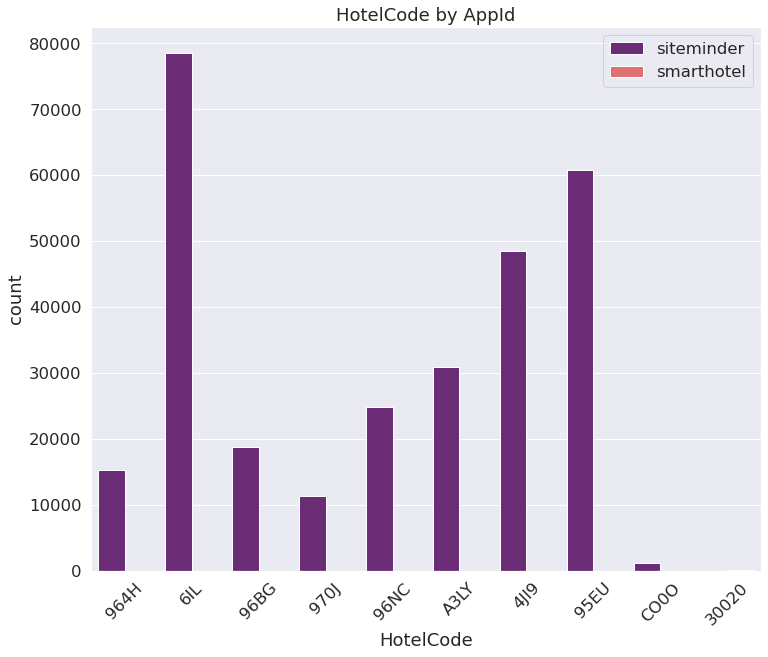

In [50]:
sns.set(font_scale = 1.5, rc={"figure.figsize":(12,10)})
sns.countplot(x = OTA_HotelRateAmountNotifRQ.HotelCode, hue = OTA_HotelRateAmountNotifRQ.AppId, data = OTA_HotelRateAmountNotifRQ, palette = 'magma')
plt.legend(loc="upper right")
plt.xticks(rotation=45)
plt.title('HotelCode by AppId')
plt.show()

#### Checking for null values for RatePlanCode

In [51]:
OTA_HotelRateAmountNotifRQ.RatePlanCode.isna().sum()

0

#### RatePlanCode by HotelCode

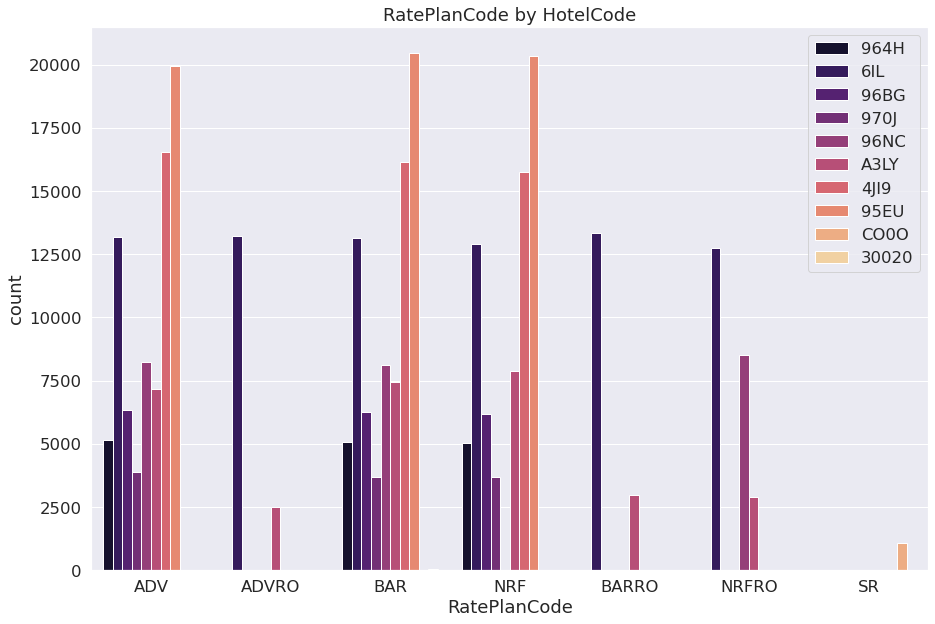

In [52]:
sns.set(font_scale = 1.5, rc={"figure.figsize":(15,10)})
sns.countplot(x = OTA_HotelRateAmountNotifRQ.RatePlanCode, hue = OTA_HotelRateAmountNotifRQ.HotelCode, data = OTA_HotelRateAmountNotifRQ, palette = "magma")
plt.legend(loc="upper right")
plt.title('RatePlanCode by HotelCode')
plt.show()

#### Checking against null values for NumberOfGuests and BaseByGuestAmt_NumberOfGuests 

In [53]:
OTA_HotelRateAmountNotifRQ.NumberOfGuests.isna().sum()

0

In [54]:
OTA_HotelRateAmountNotifRQ.BaseByGuestAmt_NumberOfGuests.isna().sum()

0

#### NumberOfGuests and BaseByGuestAmt_NumberOfGuests by HotelCode

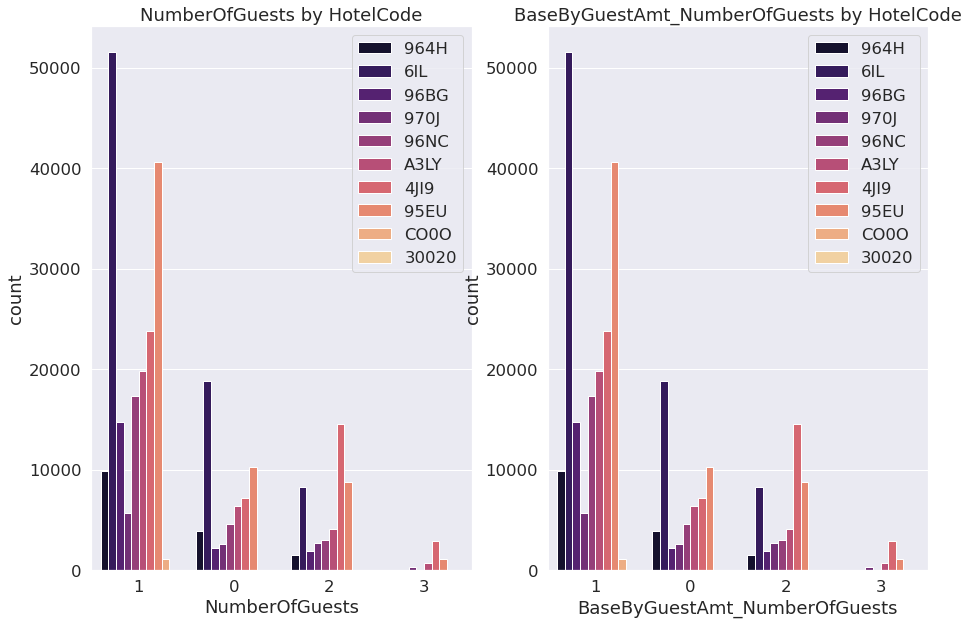

In [55]:
fig, ax =plt.subplots(1,2)
sns.set(font_scale = 1.5, rc={"figure.figsize":(55,10)})
sns.countplot(x = OTA_HotelRateAmountNotifRQ.NumberOfGuests, hue = OTA_HotelRateAmountNotifRQ.HotelCode, data = OTA_HotelRateAmountNotifRQ, palette = "magma", ax = ax[0])
sns.countplot(x = OTA_HotelRateAmountNotifRQ.BaseByGuestAmt_NumberOfGuests, hue = OTA_HotelRateAmountNotifRQ.HotelCode, data = OTA_HotelRateAmountNotifRQ, palette = "magma", ax = ax[1])
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")
ax[0].set_title('NumberOfGuests by HotelCode')
ax[1].set_title('BaseByGuestAmt_NumberOfGuests by HotelCode')
plt.show()

#### Checking against null values for AgeQualifyingCode and for BaseByGuestAmt_AgeQualifyingCode

In [56]:
OTA_HotelRateAmountNotifRQ.AgeQualifyingCode.isna().sum()

0

In [57]:
OTA_HotelRateAmountNotifRQ.BaseByGuestAmt_AgeQualifyingCode.isna().sum()

0

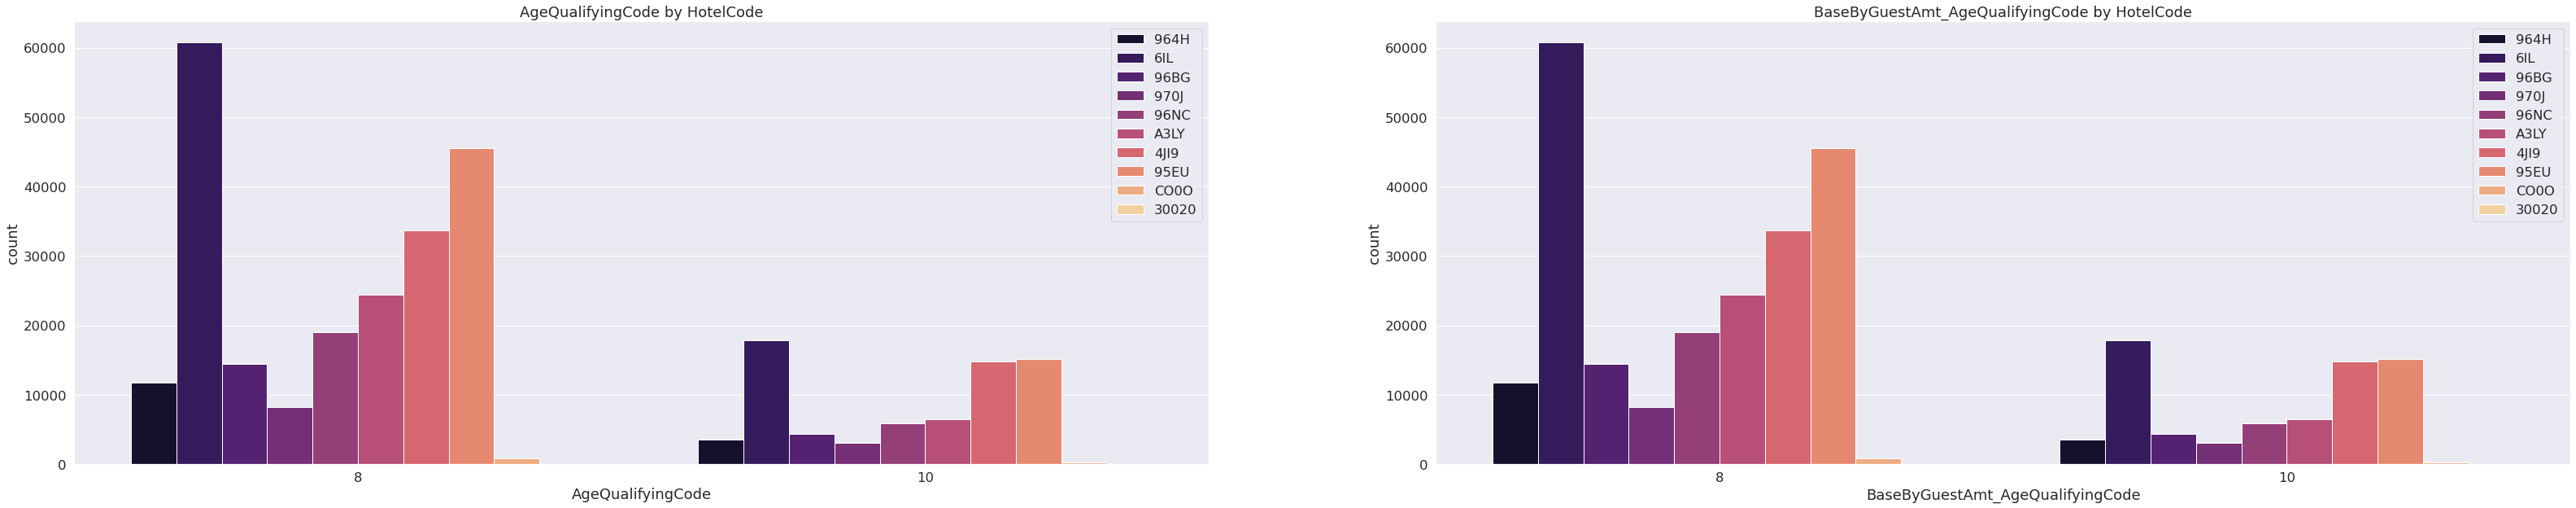

In [58]:
fig, ax =plt.subplots(1,2)
sns.set(font_scale = 1.5, rc={"figure.figsize":(15,10)})
sns.countplot(x = OTA_HotelRateAmountNotifRQ.AgeQualifyingCode, hue = OTA_HotelRateAmountNotifRQ.HotelCode, data = OTA_HotelRateAmountNotifRQ, palette = 'magma', ax = ax[0])
sns.countplot(x = OTA_HotelRateAmountNotifRQ.BaseByGuestAmt_AgeQualifyingCode, hue = OTA_HotelRateAmountNotifRQ.HotelCode, data = OTA_HotelRateAmountNotifRQ, palette = 'magma', ax = ax[1])
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")
ax[0].set_title('AgeQualifyingCode by HotelCode')
ax[1].set_title('BaseByGuestAmt_AgeQualifyingCode by HotelCode')
plt.show()

#### Checking against null values for CurrencyCode and BaseByGuestAmt_CurrencyCode

In [59]:
OTA_HotelRateAmountNotifRQ.CurrencyCode.isna().sum()

48

In [60]:
OTA_HotelRateAmountNotifRQ.BaseByGuestAmt_CurrencyCode.isna().sum()

48

#### CurrencyCode and BaseByGuestAmt_CurrencyCode by HotelCode - comparizon of information sent in these fields

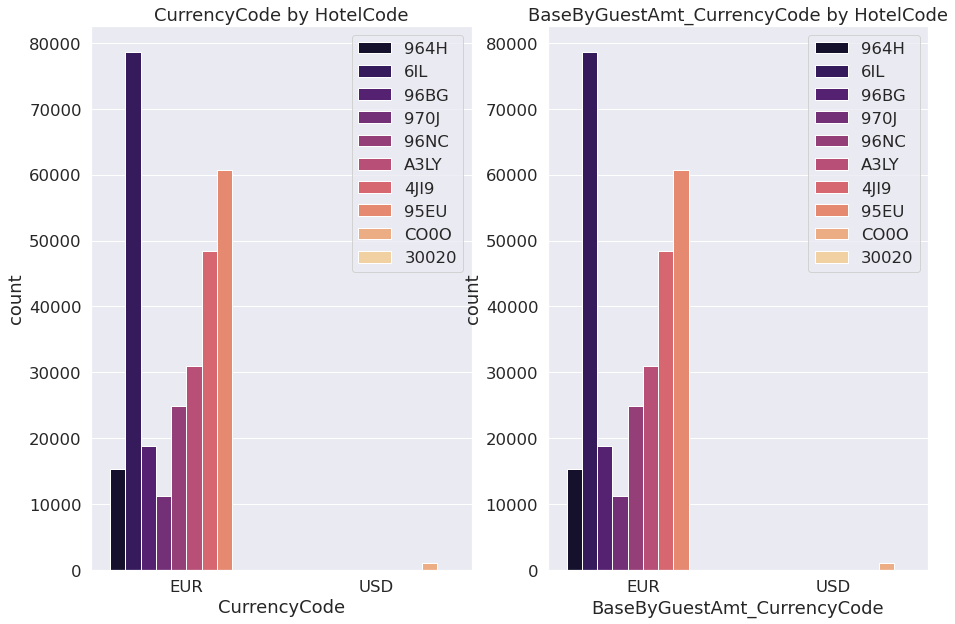

In [61]:
fig, ax =plt.subplots(1,2)
sns.set(font_scale = 1.5, rc={"figure.figsize":(15,10)})
sns.countplot(x = OTA_HotelRateAmountNotifRQ.CurrencyCode, hue = OTA_HotelRateAmountNotifRQ.HotelCode, data = OTA_HotelRateAmountNotifRQ, palette = 'magma', ax = ax[0])
sns.countplot(x = OTA_HotelRateAmountNotifRQ.BaseByGuestAmt_CurrencyCode, hue = OTA_HotelRateAmountNotifRQ.HotelCode, data = OTA_HotelRateAmountNotifRQ, palette = 'magma', ax = ax[1])
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")
ax[0].set_title('CurrencyCode by HotelCode')
ax[1].set_title('BaseByGuestAmt_CurrencyCode by HotelCode')
plt.show()

#### Checking against null values for Start and Rate_Start

In [62]:
OTA_HotelRateAmountNotifRQ.Start.isna().sum()

0

In [63]:
OTA_HotelRateAmountNotifRQ.Rate_Start.isna().sum()

48

#### Start and Rate_Start by HotelCode - comparizon of information sent in these fields

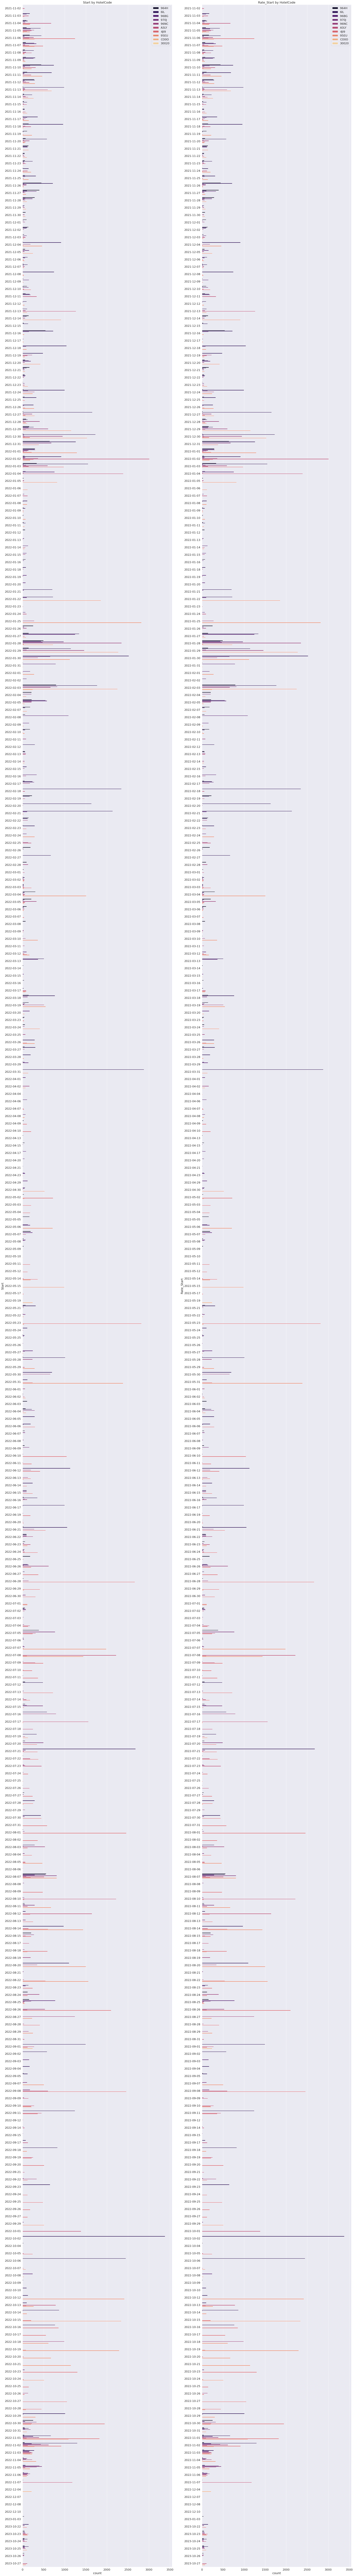

In [65]:
fig, ax =plt.subplots(1,2)
sns.set(font_scale = 1.5, rc={"figure.figsize":(35,280)})
sns.countplot(y = OTA_HotelRateAmountNotifRQ.Start.sort_values(), hue = OTA_HotelRateAmountNotifRQ.HotelCode, data = OTA_HotelRateAmountNotifRQ, palette = 'magma', ax = ax[0])
sns.countplot(y = OTA_HotelRateAmountNotifRQ.Rate_Start.sort_values(), hue = OTA_HotelRateAmountNotifRQ.HotelCode, data = OTA_HotelRateAmountNotifRQ, palette = 'magma', ax = ax[1])
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")
ax[0].set_title('Start by HotelCode')
ax[1].set_title('Rate_Start by HotelCode')
plt.show()

#### Checking against null values for End and Rate_End

In [66]:
OTA_HotelRateAmountNotifRQ.End.isna().sum()

0

In [67]:
OTA_HotelRateAmountNotifRQ.Rate_End.isna().sum()

48

#### End and Rate_End by HotelCode - comparizon of information sent in these fields

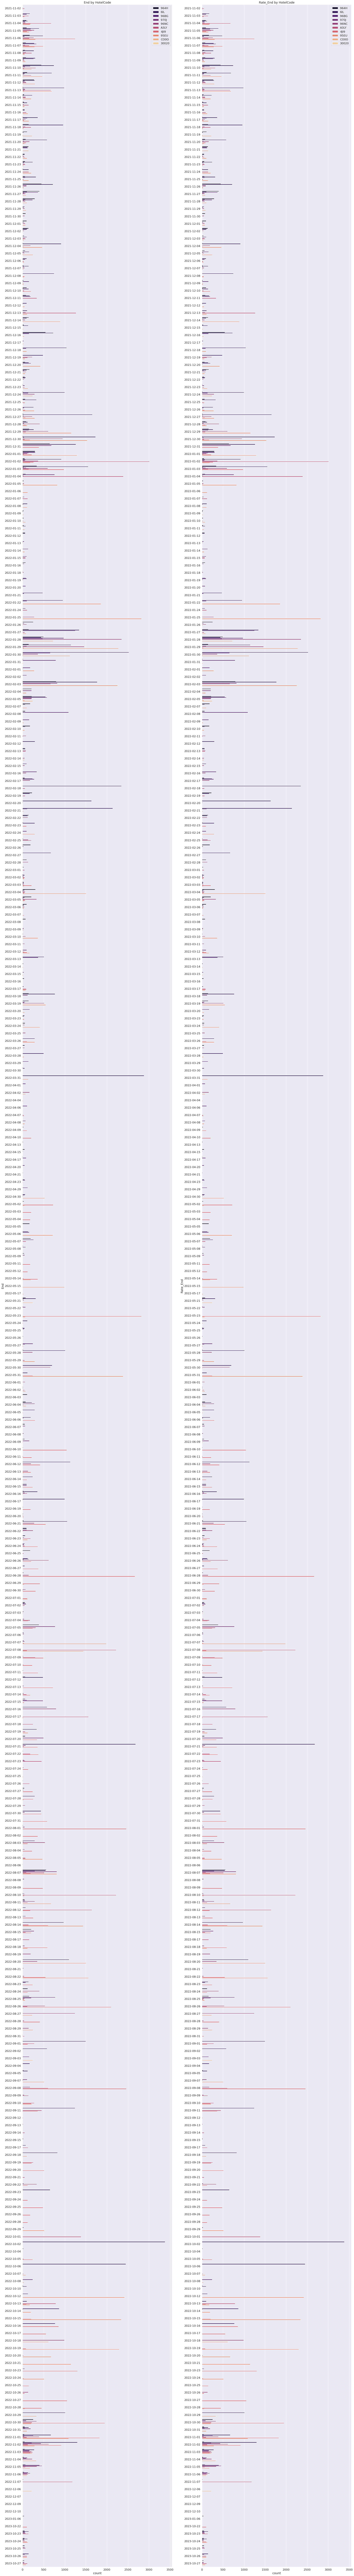

In [68]:
fig, ax =plt.subplots(1,2)
sns.set(font_scale = 1.5, rc={"figure.figsize":(35,280)})
sns.countplot(y = OTA_HotelRateAmountNotifRQ.End.sort_values(), hue = OTA_HotelRateAmountNotifRQ.HotelCode, data = OTA_HotelRateAmountNotifRQ, palette = 'magma', ax = ax[0])
sns.countplot(y = OTA_HotelRateAmountNotifRQ.Rate_End.sort_values(), hue = OTA_HotelRateAmountNotifRQ.HotelCode, data = OTA_HotelRateAmountNotifRQ, palette = 'magma', ax = ax[1])
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")
ax[0].set_title('End by HotelCode')
ax[1].set_title('Rate_End by HotelCode')
plt.show()